In [55]:
import pandas as pd
import numpy as np
import sys, os, re
import matplotlib.pyplot as plt

from importlib import reload

if re.match(r'^(\w\:\\)|(/)', os.getcwd()):
    sys.path.insert(0, "c:/Users/dmitr/devs/quantl/")
    sys.path.insert(0, "c:/Users/dmitr/devs/Qube2exp/src/")
    # sys.path.insert(0, "c:/Users/dmitr/devs/Qube/")
    print('installed')

import quantl.impl.indicators as Q

%load_ext cython

T = pd.date_range('2024-01-01 00:00', freq='1Min', periods=100_000)
ds = 1 + (2*np.random.randn(len(T))).cumsum()
data = list(zip(T, ds))

installed
The cython extension is already loaded. To reload it, use:
  %reload_ext cython


## Cython v2 tests (cseries1)

In [152]:
%load_ext autoreload
%autoreload 2

from qube.utils import reload_pyx_module

reload_pyx_module('../../src/qube/core/')
from qube.core.cseries1 import TimeSeries
del sys.modules['qube.core.cseries1']
from qube.core.cseries1 import (TimeSeries, Sma, Ema, recognize_time, Tema, Dema, Kama, RollingSum)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
 > Reloaded ../../src/qube/core\cseries.pyx
 > Reloaded ../../src/qube/core\cseries1.pyx


### Series Testing

In [183]:
%%timeit
ts = TimeSeries('test', '10Min')
ts.update(recognize_time('2024-01-01 00:00'), 1)
ts.update(recognize_time('2024-01-01 00:01'), 5)
ts.update(recognize_time('2024-01-01 00:06'), 2)
ts.update(recognize_time('2024-01-01 00:12'), 3)
ts.update(recognize_time('2024-01-01 00:21'), 4)
ts.update(recognize_time('2024-01-01 00:22'), 5)
ts.update(recognize_time('2024-01-01 00:31'), 6)
ts.update(recognize_time('2024-01-01 00:33'), 7)
ts.update(recognize_time('2024-01-01 00:45'), -12)
ts.update(recognize_time('2024-01-01 00:55'), 12)
ts.update(recognize_time('2024-01-01 01:00'), 12)
# print(str(ts))

20 µs ± 958 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### <font color='orange'>WIP</font>

In [153]:
# %%timeit 
ts = TimeSeries('close', '1h')
s1 = Sma(ts, 50)
e1 = Ema(ts, 50)
ss1 = Sma(s1, 50)
ee1 = Ema(e1, 50)
t1 = Tema(ts, 50)
k1 = Kama(ts, 50)
[ts.update(ti.asm8, vi) for ti, vi in data];

In [154]:
x0 = pd.Series(ds, T).resample('1H').last()
qt = Q.KAMA(50)
for t,v in zip(x0.index, x0.values):
    qt.update(v, t)

In [ ]:
plt.plot(ts.to_series(), lw=0.5)
plt.plot(k1.to_series())
plt.plot(pd.Series(qt.to_dict()['kama(50,2,30)']))

In [ ]:
plt.plot(ts.to_series(), lw=0.5)
plt.plot(Tema(ts, 50).to_series())
plt.plot(Dema(ts, 50).to_series())
plt.plot(t1.to_series())

In [157]:
# %%timeit
x0 = ts.to_series()
pe1 = x0.ewm(span=50, min_periods=50).mean()
pee1 = pe1.ewm(span=50, min_periods=50).mean()
ps1 = x0.rolling(50).mean()
pss1 = ps1.rolling(50).mean()

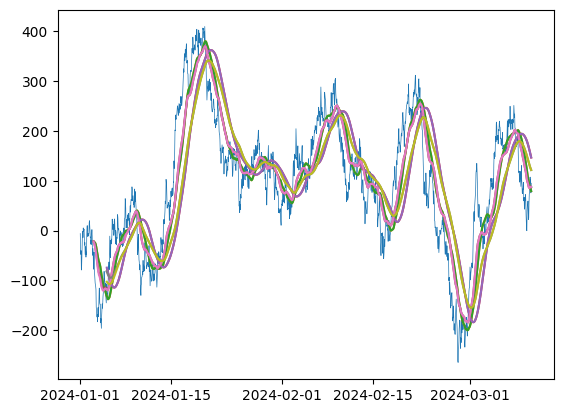

In [162]:
plt.plot(x0, lw=0.5)
plt.plot(s1.to_series()); plt.plot(ps1)
plt.plot(ss1.to_series()); plt.plot(pss1)
plt.plot(e1.to_series()); plt.plot(pe1)
plt.plot(ee1.to_series()); plt.plot(pee1)
# plt.plot(s1.to_series()-ps1)

In [163]:
# %%timeit
s1 = Sma(ts, 50)
e1 = Ema(ts, 50)
ss1 = Sma(s1, 50)
ee1 = Ema(e1, 50)
k1 = Kama(e1, 50)

In [ ]:
plt.plot(e1.to_series()); plt.plot(k1.to_series())

### work ... 

In [120]:
ts0 = TimeSeries('close', '1Min')
# em0 = Sma(ts0, 3)
# em1 = Sma(em0, 3)
k0 = Kama(ts0, 6)  

for t, v in [
    ('2024-01-01 00:00', 9), ('2024-01-01 00:00', 1),
    ('2024-01-01 00:01', 2), ('2024-01-01 00:01', 3),   ('2024-01-01 00:01', 2),
    ('2024-01-01 00:02', 3),
    ('2024-01-01 00:03', 4),
    ('2024-01-01 00:04', 5), ('2024-01-01 00:04', 5.1), ('2024-01-01 00:04:20', 5),
    ('2024-01-01 00:05', 6), ('2024-01-01 00:05', 7),   ('2024-01-01 00:05', 6.1),
    ('2024-01-01 00:07', 8), ('2024-01-01 00:07', -1),  ('2024-01-01 00:07', 8),
    ('2024-01-01 00:08', 8),
    ('2024-01-01 00:09', 8),
    ('2024-01-01 00:10', 12),
    ('2024-01-01 00:11', 13),
    ('2024-01-01 00:12', 14),
    ('2024-01-01 00:13', 15),
    ('2024-01-01 00:14', 17),
    ('2024-01-01 00:15', 4),
]:
    ts0.update(recognize_time(t), v)

In [121]:
k0.to_series()

2024-01-01 00:00:00          NaN
2024-01-01 00:01:00          NaN
2024-01-01 00:02:00          NaN
2024-01-01 00:03:00          NaN
2024-01-01 00:04:00          NaN
2024-01-01 00:05:00     6.100000
2024-01-01 00:07:00     6.740583
2024-01-01 00:08:00     7.144484
2024-01-01 00:09:00     7.399748
2024-01-01 00:10:00     9.008693
2024-01-01 00:11:00    10.369351
2024-01-01 00:12:00    11.358060
2024-01-01 00:13:00    12.976700
2024-01-01 00:14:00    14.764833
2024-01-01 00:15:00    13.899762
Name: kama(6,2,30), dtype: float64